Transfer learning (семинары)

Урок 3. Model as a service и разные применения Transfer learning

In [1]:
# Устанавливаем библиотеку
!pip install transformers

In [2]:
import transformers
# Use a pipeline as a high-level helper
from transformers import pipeline
# Выберем модель НС на https://huggingface.co/
classifier = pipeline("text-classification", model="seara/rubert-tiny2-ru-go-emotions")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.94k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/410 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [3]:
dict_label = {
'admiration': 'восхищение',
'amusement': 'веселье',
'anger': 'злость',
'annoyance': 'раздражение',
'approval': 'одобрение',
'caring': 'забота',
'confusion': 'непонимание',
'curiosity': 'любопытство',
'desire': 'желание',
'disappointment': 'разочарование',
'disapproval': 'неодобрение',
'disgust': 'отвращение',
'embarrassment': 'смущение',
'excitement': 'возбуждение',
'fear': 'страх',
'gratitude': 'признательность',
'grief': 'горе',
'joy': 'радость',
'love': 'любовь',
'nervousness': 'нервозность',
'optimism': 'оптимизм',
'pride': 'гордость',
'realization': 'осознание',
'relief': 'облегчение',
'remorse': 'раскаяние',
'sadness': 'грусть',
'surprise': 'удивление',
'neutral': 'нейтральность',
}

In [5]:
# Определение функции для присвоения метки настроения на основе текста отзыва
def get_sentiment_label(text, dict_label, classifier):
    '''
    Функция выводит русифицированную метку настроения.

    :param text: текст по которому будем определять тональность,
    :param dict_label: рускоязычное обозначение тональности,
    :param classifier: модель НС определения тональности текста,
    :return: возвращает русифицированную оценку тональности.
    '''
    value = classifier(text)[0]['label']
    value = dict_label[value]
    return value

In [6]:
text = ["Отличный товар",
            "Мне не понравилось",
            "Прекрасно выглядит, ничего не меняйте!",
            "Ничего не понял",
            "У меня не работала розетка, в остальном все отлично"]
classifier( text )

[{'label': 'admiration', 'score': 0.9183667302131653},
 {'label': 'disapproval', 'score': 0.3069019019603729},
 {'label': 'admiration', 'score': 0.9194331169128418},
 {'label': 'neutral', 'score': 0.5132651329040527},
 {'label': 'admiration', 'score': 0.7506750226020813}]

In [8]:
import pandas as pd

df = pd.DataFrame()
# Загружаем текст наших отзывов в датафрейм
df['text'] =  pd.DataFrame(text)
# Применение функции к столбцу 'text' датасета для присвоения меток настроения
df['sentiment_label'] = df['text'].apply(lambda x : get_sentiment_label(x, dict_label, classifier))

In [9]:
df

,text,sentiment_label
0,Отличный товар,восхищение
1,Мне не понравилось,неодобрение
2,"Прекрасно выглядит, ничего не меняйте!",восхищение
3,Ничего не понял,нейтральность
4,"У меня не работала розетка, в остальном все от...",восхищение


<Axes: >

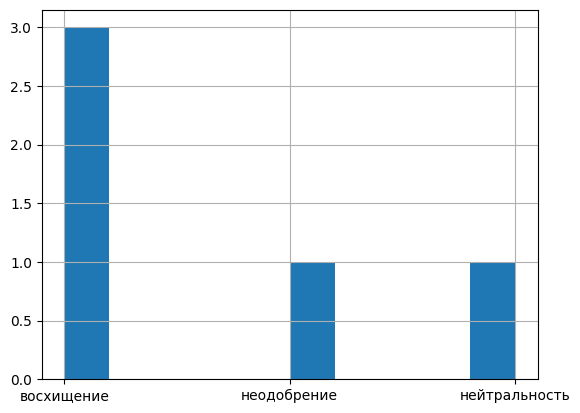

In [10]:
df['sentiment_label'].hist()

Вывод:

Нашел подходящую русскоязычную модель определения тональности текста на Hugging Face, потестил её там на примерах из ДЗ.

Как запустить сервис на основе модели?
Например, в Gradio:

https://huggingface.co/spaces/gradio/chatbot
https://www.kdnuggets.com/2023/06/build-ai-chatbot-5-minutes-hugging-face-gradio.html
Или в Huggingface Spaces: https://huggingface.co/spaces

Работа с кодом:

In [1]:
from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model="huggingface/CodeBERTa-small-v1",
    tokenizer="huggingface/CodeBERTa-small-v1"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/336M [00:00<?, ?B/s]

Some weights of the model checkpoint at huggingface/CodeBERTa-small-v1 were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/19.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/994k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/483k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [2]:
python_code = """
# a list of numbers
my_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]
my_numbers.<mask>


"""

In [3]:
fill_mask( python_code )

[{'score': 0.5379528999328613,
  'token': 1942,
  'token_str': 'sort',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.sort\n\n\n'},
 {'score': 0.08208338171243668,
  'token': 3059,
  'token_str': 'clear',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.clear\n\n\n'},
 {'score': 0.05829783156514168,
  'token': 5648,
  'token_str': 'reverse',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.reverse\n\n\n'},
 {'score': 0.027740854769945145,
  'token': 812,
  'token_str': 'append',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.append\n\n\n'},
 {'score': 0.0187204722315073,
  'token': 808,
  'token_str': 'length',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.length\n\n\n'}]